<a href="https://colab.research.google.com/github/vkthakur90/jupyter_notebooks/blob/master/Convolution_CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
import tensorflow.keras as tfk
import tensorflow.keras.models as tfkm
import tensorflow.keras.layers as tfkl
import tensorflow.keras.utils as tfku

In [3]:
(x_train, y_train), (x_test, y_test) = tfk.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [4]:
x_train.dtype

dtype('uint8')

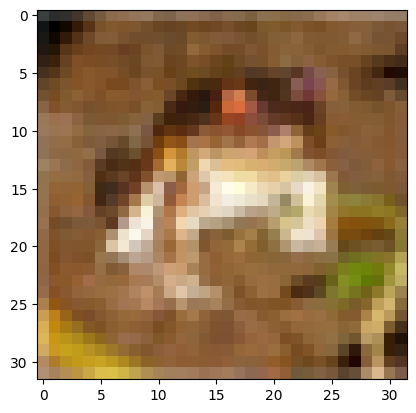

In [5]:
plt.imshow(x_train[0])

In [6]:
class ConvBlock(tfkm.Model):
    def __init__(self, **kwds):
        input_shape = kwds['input_shape']
        in_channel = input_shape[-1]

        inp = tfkl.Input(input_shape)

        x = inp

        res = x
        x1 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x)
        x1 = tfkl.BatchNormalization()(x1)
        x1 = tfkl.LeakyReLU()(x1)
        x1 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x1)

        x2 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x)
        x2 = tfkl.BatchNormalization()(x2)
        x2 = tfkl.LeakyReLU()(x2)
        x2 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x2)
        x2 = tfkl.BatchNormalization()(x2)
        x2 = tfkl.LeakyReLU()(x2)
        x2 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x2)
        x2 = tfkl.BatchNormalization()(x2)
        x2 = tfkl.LeakyReLU()(x2)
        x2 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x2)

        x3 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x)
        x3 = tfkl.BatchNormalization()(x3)
        x3 = tfkl.LeakyReLU()(x3)
        x3 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x3)
        x3 = tfkl.BatchNormalization()(x3)
        x3 = tfkl.LeakyReLU()(x3)
        x3 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x3)
        x3 = tfkl.BatchNormalization()(x3)
        x3 = tfkl.LeakyReLU()(x3)
        x3 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x3)
        x3 = tfkl.BatchNormalization()(x3)
        x3 = tfkl.LeakyReLU()(x3)
        x3 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x3)
        x3 = tfkl.BatchNormalization()(x3)
        x3 = tfkl.LeakyReLU()(x3)
        x3 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x3)

        x4 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (1, 3), padding = 'same')(x4)
        x4 = tfkl.BatchNormalization()(x4)
        x4 = tfkl.LeakyReLU()(x4)
        x4 = tfkl.DepthwiseConv2D(kernel_size = (3, 1), padding = 'same')(x4)

        x = tfkl.Concatenate()([x1, x2, x3, x4])

        x = tfkl.BatchNormalization(axis = 3)(x)
        x = tfkl.Activation('gelu')(x)
        x = tfkl.Dense(in_channel)(x)

        x = tfkl.Add()([x, res])

        out = x

        super(ConvBlock, self).__init__(inputs = [inp], outputs = [out])



In [7]:
class ConvModel(tfk.Model):
    def __init__(self, **kwds):
        inp = tfkl.Input([32, 32, 3])

        x = inp
        x = tfkl.Rescaling(scale = 1/127.5, offset = -1)(x)

        shape = [32, 32, 3]

        for idx in range(5):
            for _ in range(5 - idx):
                x = ConvBlock(input_shape = shape)(x)

            H, W, C = shape

            x = tfkl.Dense(2 * C)(x)
            x = tfkl.AvgPool2D((2, 2))(x)

            shape = [int(H/2), int(W/2), int(2*C)]


        #x = tfkl.Dense(2 * channels)(x)
        x = tfkl.Flatten()(x)
        x = tfkl.Dense(10)(x)
        out = x

        super(ConvModel, self).__init__(inputs = [inp], outputs = [out])


In [8]:
model = ConvModel()

In [9]:
model.summary()

Model: "conv_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 rescaling (Rescaling)       (None, 32, 32, 3)         0         
                                                                 
 conv_block (ConvBlock)      (None, 32, 32, 3)         519       
                                                                 
 conv_block_1 (ConvBlock)    (None, 32, 32, 3)         519       
                                                                 
 conv_block_2 (ConvBlock)    (None, 32, 32, 3)         519       
                                                                 
 conv_block_3 (ConvBlock)    (None, 32, 32, 3)         519       
                                                                 
 conv_block_4 (ConvBlock)    (None, 32, 32, 3)         5

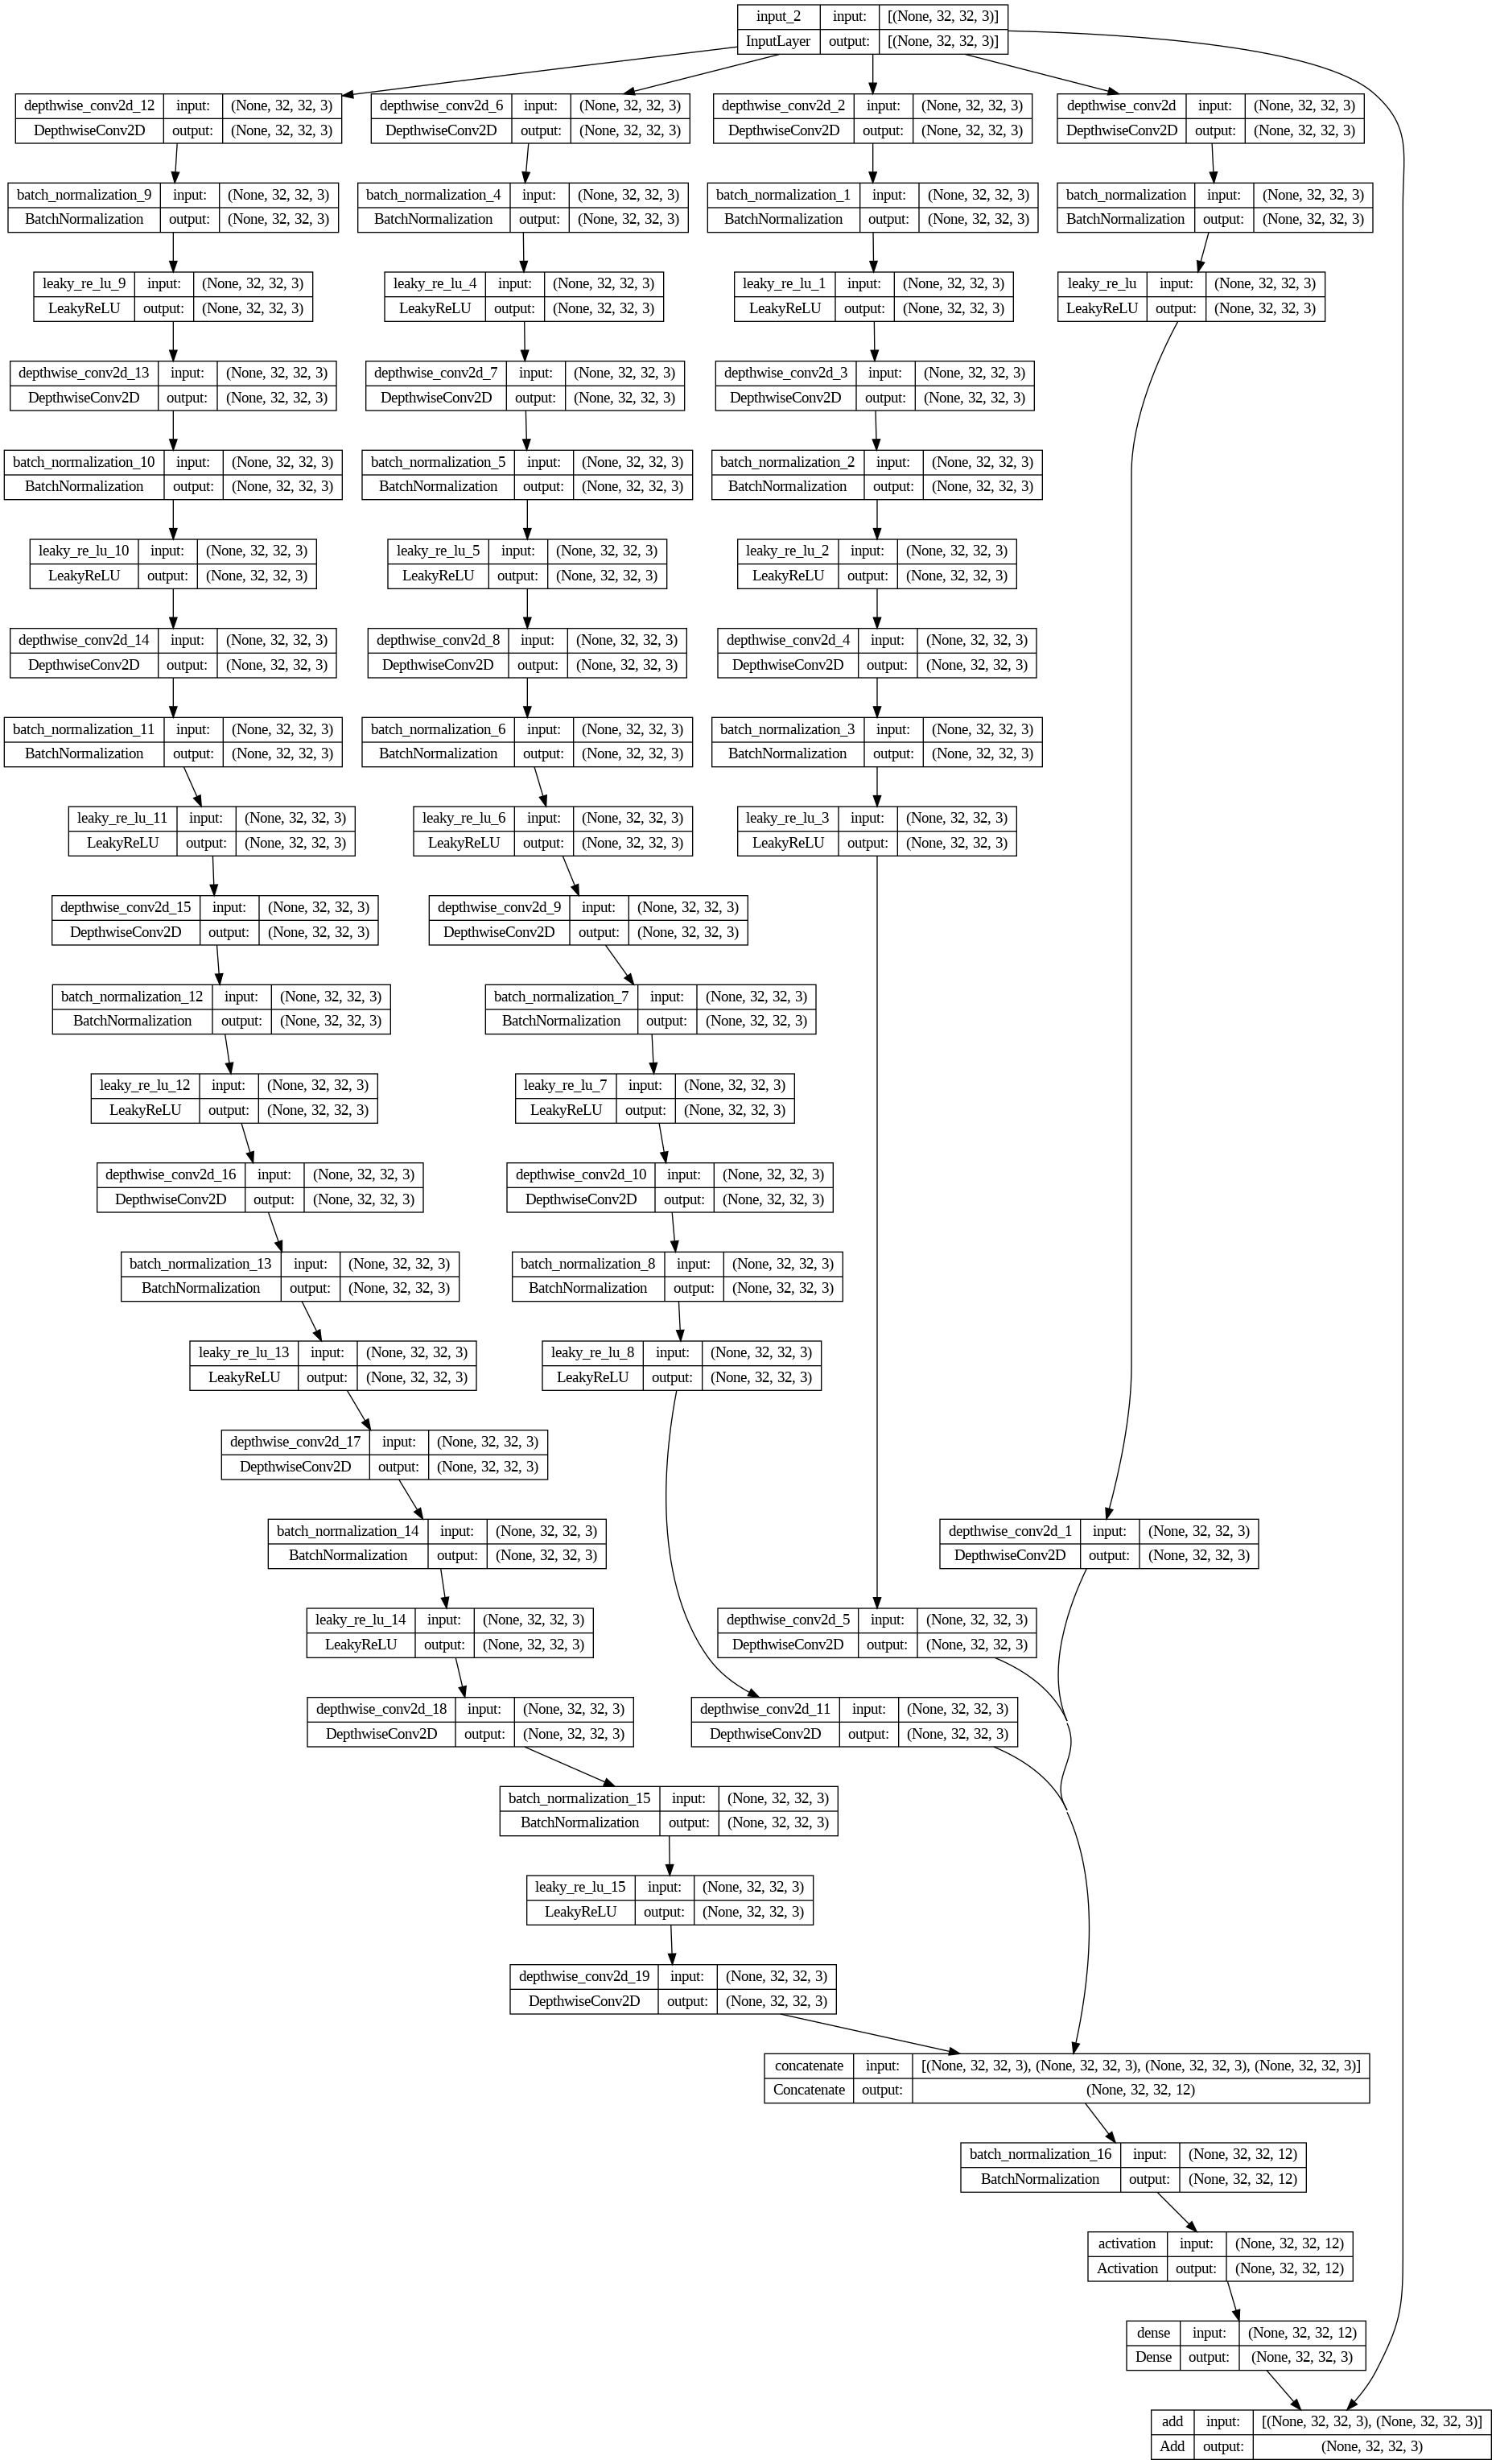

In [10]:
tfku.plot_model(model.layers[2], show_shapes = True)

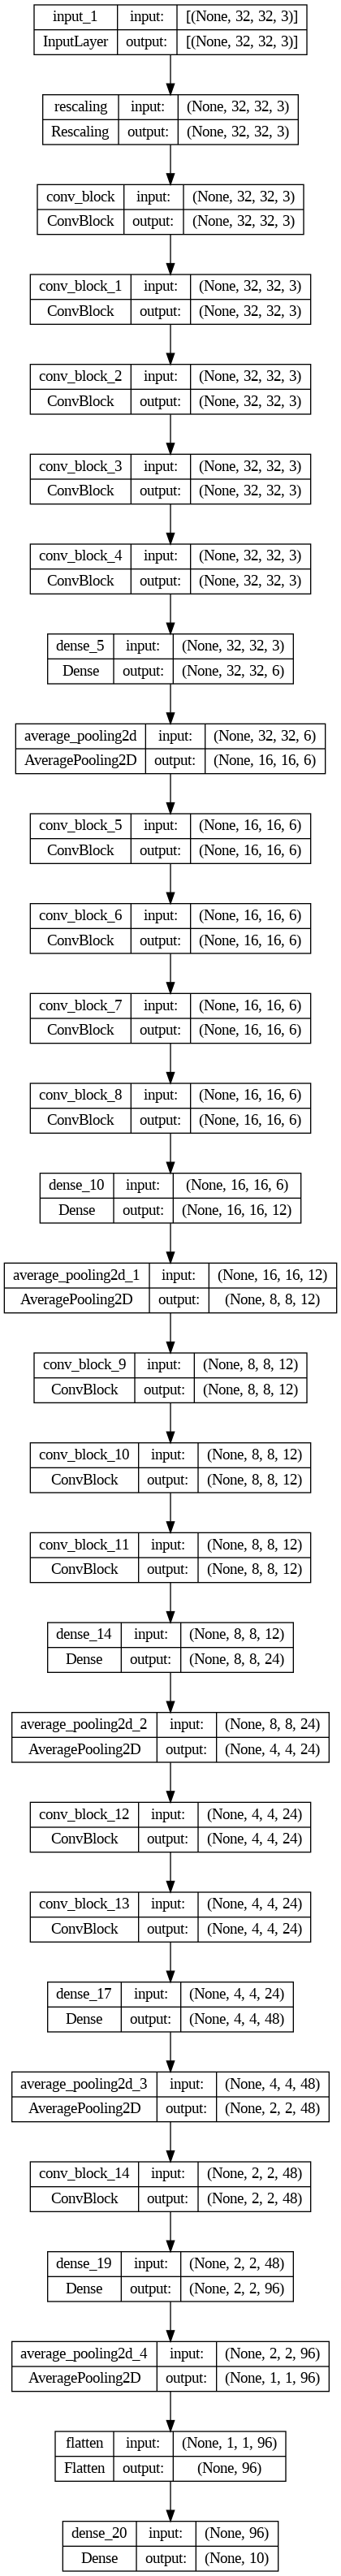

In [11]:
tfku.plot_model(model, show_shapes = True)

In [12]:
def train_fn(batch_size, epochs):
    dataset = (
        tf.data.Dataset.from_tensor_slices((x_train, y_train))
                       .repeat(epochs)
                       .shuffle(10 * batch_size)
                       .batch(batch_size)
                       .prefetch(4 * batch_size)
    )

    model.compile(
        optimizer = tfk.optimizers.AdamW(),
        loss = 'sparse_categorical_crossentropy',
        metrics = ['accuracy']
    )

    model.fit(dataset)

In [13]:
train_fn(8, 4)

  102/25000 [..............................] - ETA: 3:32:05 - loss: 7.2577 - accuracy: 0.0858

KeyboardInterrupt: ignored

In [ ]:
model.evaluate(x = x_train, y = y_train)